## Macroeconomic Talking Points (July 09, 2022)

### Professor Timothy H. Savage, Ph.D. CRE

#### NYU Schack Institute of Real Estate

#### Faculty Director | CREFC Center for Real Estate Finance at NYU Schack

#### Mentor | Real Estate Research Institute

#### Cheif Economist | Haystacks.AI

In [1]:
%pylab inline
from IPython.display import Image
import urllib.request as url
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
import patsy
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

import datetime as dt
from fredapi import Fred
fred = Fred(api_key='30e6ecb242a73869e11cb35f6aa3afc3')

Populating the interactive namespace from numpy and matplotlib


## The Prior U.S. Economic Cycle (2009 - 2019)
* Hated By Many



> Barry Ritholtz, [Why So Many People Hate This Recovery](https://www.bloomberg.com/opinion/articles/2015-11-16/why-so-many-people-hate-this-economic-recovery)

## June 2020
* Q2 2020 GDP contraction much larger than global financial crisis.
* 10-year U.S. Treasury had fallen to ~50 bps.
* NBER formally declares the U.S. to be in a recession. 

## The Current Economic Cycle (2021 - ?)

* Ten Year is north of a three handle.
* Yield curve is a at one handle.
* Nominal growth remains positive, while real growth dipped slightly in Q1 2022 after a strong Q4 2021.
* Equity markets are off by about 25% from their peak. 
* Ten-year break-even continues to fall.
* Labor markets have largely recovered.
* The share of the fully-vaccinated population above five years old stands at ~67%

## Growth Forecasts Show High Variability

* [Bill McBride](https://www.calculatedriskblog.com/2022/07/q2-gdp-forecasts-slightly-negative.html) on variability.  
    * NB1: GS has not changed their forecast, and they have the most prominent research shops in the private sector.
    * NB2: The NY Fed noted that its DSGE forecast [had weakened](https://libertystreeteconomics.newyorkfed.org/2022/06/the-new-york-fed-dsge-model-forecast-june-2022/#:~:text=The%20model's%20outlook%20is%20considerably,2023%20and%202024%2C%20respectively) in the last six months, but I've never seen a paper that examines DSGE models out of sample.

In [2]:
ten_year = fred.get_series("DGS10", observation_start='1990-01-01')
one_year = fred.get_series("DGS1", observation_start='1990-01-01')
three_month = fred.get_series("DGS3MO", observation_start='1990-01-01')

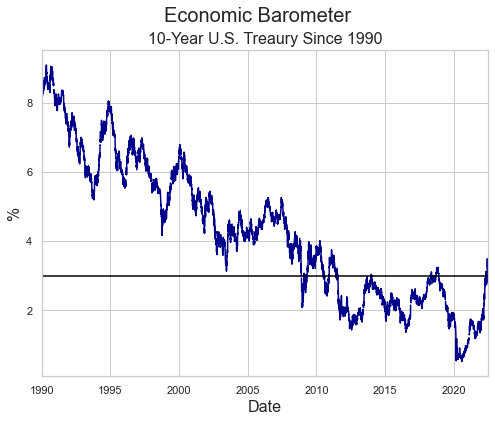

In [3]:
ten_year.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('10-Year U.S. Treaury Since 1990', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(3.0, color="black")

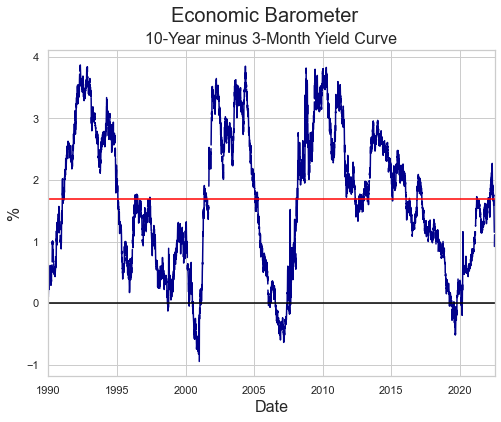

In [4]:
yield_curve = fred.get_series("T10Y3M", observation_start='1990-01-01')
yield_curve.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('10-Year minus 3-Month Yield Curve', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(1.685, color="red")
plt.axhline(0, color="black")

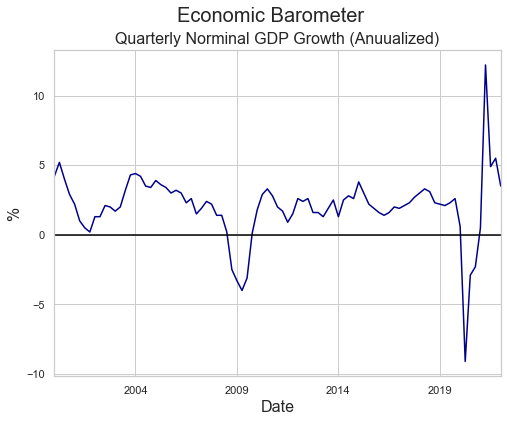

In [5]:
growth = fred.get_series("A191RO1Q156NBEA", observation_start='2000-01-01')
growth.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Quarterly Norminal GDP Growth (Anuualized)', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color='black')

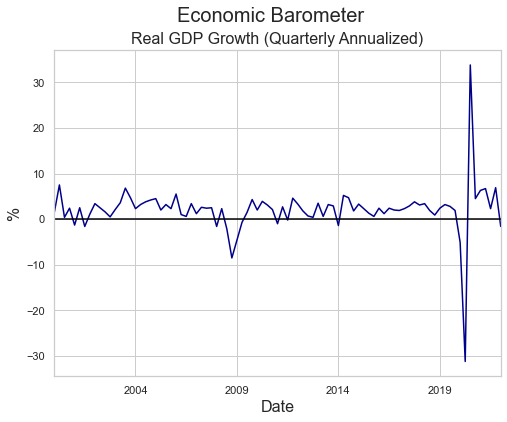

In [6]:
growth = fred.get_series("A191RL1Q225SBEA", observation_start='2000-01-01').dropna()
growth.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Real GDP Growth (Quarterly Annualized)', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color="black")

Text(0, 0.5, 'Tillions $')

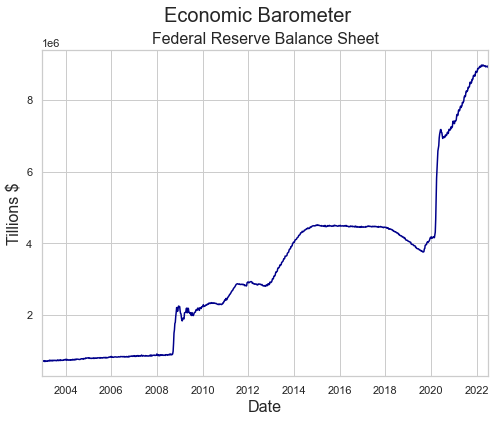

In [7]:
balance_sheet = fred.get_series("WALCL", observation_start='1990-01-01')
balance_sheet.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Federal Reserve Balance Sheet', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Tillions $', fontsize=16)

Text(0, 0.5, '')

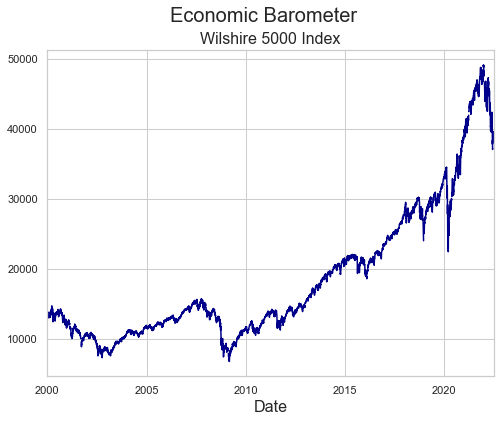

In [8]:
wilshire = fred.get_series("WILL5000PR", observation_start='2000-01-01')
wilshire.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Wilshire 5000 Index', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('', fontsize=16)

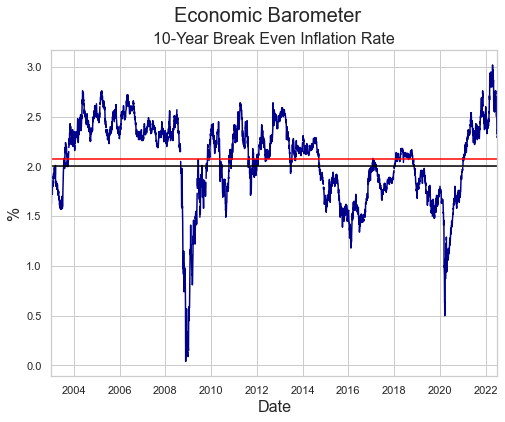

In [9]:
break_even = fred.get_series("T10YIE", observation_start='1990-01-01')
break_even.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('10-Year Break Even Inflation Rate', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(2.07, color="red")
plt.axhline(2, color="black")

Text(0, 0.5, 'Millions ($)')

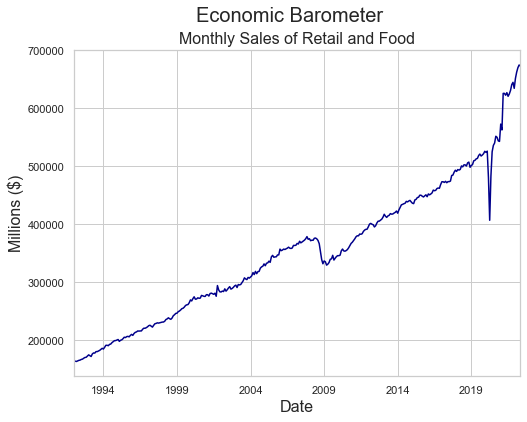

In [10]:
sales = fred.get_series("RSAFS", observation_start='1990-01-01')
sales.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Monthly Sales of Retail and Food', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Millions ($)', fontsize=16)

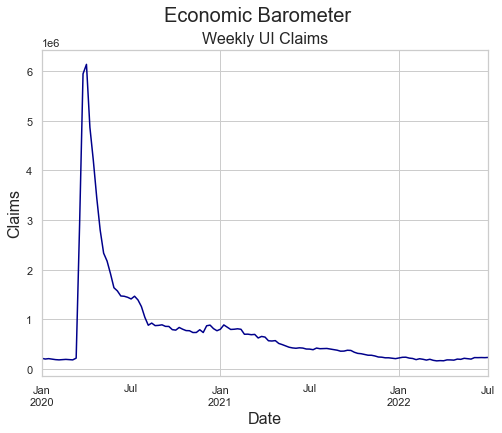

In [11]:
claims = fred.get_series("ICSA", observation_start='2020-01-01')
claims.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Weekly UI Claims', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Claims', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

Text(0, 0.5, '%')

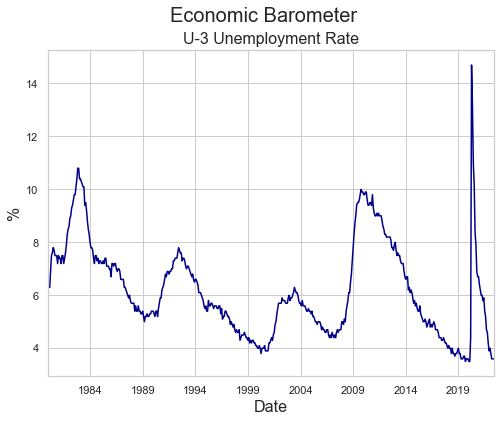

In [12]:
unemp_rate = fred.get_series("UNRATE", observation_start='1980-01-01')
unemp_rate.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('U-3 Unemployment Rate', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)

Text(0, 0.5, '%')

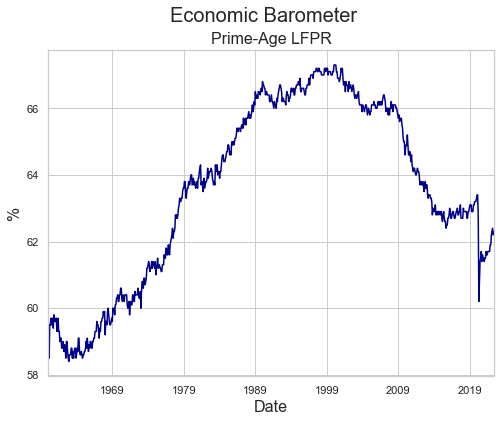

In [13]:
lfpr = fred.get_series("CIVPART", observation_start='1960-01-01')
lfpr.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Economic Barometer', fontsize=20)
plt.title('Prime-Age LFPR', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)

## Visualizations as Sufficient Statistics
* [Source](https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations)

In [14]:
current_population = 332403650 * 0.94
vaccination = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv')
vaccination = vaccination[vaccination['location'] == 'United States']
vaccination = vaccination[40:]
vaccination['date'].astype(str)
vaccination['date'] = pd.to_datetime(vaccination['date'], format='%Y-%m-%d')
vaccination = vaccination.set_index('date')
vaccination['people_outstanding'] = (current_population - vaccination['people_fully_vaccinated'])
vaccination['outstanding'] = (current_population - vaccination['people_fully_vaccinated']) / current_population * 100
vaccination['rate'] = vaccination['daily_vaccinations_per_million'] / 1000000 
vaccination.tail(20)

,location,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred,people_outstanding,outstanding,rate
date,,,,,,,,,,,,,,,,,,
2022-06-16,United States,USA,594312303.0,259549661.0,222065759.0,122284869.0,273263.0,238608.0,179.00,78.18,66.89,36.83,719.0,35891.0,0.011,90393672.0,28.929731,0.000719
2022-06-17,United States,USA,594603564.0,259592697.0,222101407.0,122484700.0,291261.0,231530.0,179.09,78.19,66.90,36.89,697.0,35268.0,0.011,90358024.0,28.918322,0.000697
2022-06-18,United States,USA,594732223.0,259615292.0,222118891.0,122567026.0,128659.0,227057.0,179.13,78.20,66.90,36.92,684.0,34864.0,0.011,90340540.0,28.912726,0.000684
2022-06-19,United States,USA,594793514.0,259627147.0,222127773.0,122604129.0,61291.0,223583.0,179.15,78.20,66.90,36.93,673.0,34334.0,0.010,90331658.0,28.909884,0.000673
2022-06-20,United States,USA,595022100.0,259663239.0,222153119.0,122761788.0,228586.0,218507.0,179.22,78.21,66.91,36.98,658.0,33729.0,0.010,90306312.0,28.901772,0.000658
2022-06-21,United States,USA,595275768.0,259709086.0,222183831.0,122929733.0,253668.0,216140.0,179.30,78.22,66.92,37.03,651.0,34447.0,0.010,90275600.0,28.891943,0.000651
2022-06-22,United States,USA,595537118.0,259764096.0,222215000.0,123095422.0,261350.0,214011.0,179.37,78.24,66.93,37.08,645.0,36460.0,0.011,90244431.0,28.881967,0.000645
2022-06-23,United States,USA,595801723.0,259825112.0,222244835.0,123259655.0,264605.0,212774.0,179.45,78.26,66.94,37.13,641.0,39350.0,0.012,90214596.0,28.872419,0.000641
2022-06-24,United States,USA,596092281.0,259895992.0,222277945.0,123434259.0,290558.0,212674.0,179.54,78.28,66.95,37.18,641.0,43328.0,0.013,90181486.0,28.861822,0.000641


Text(0, 0.5, '%')

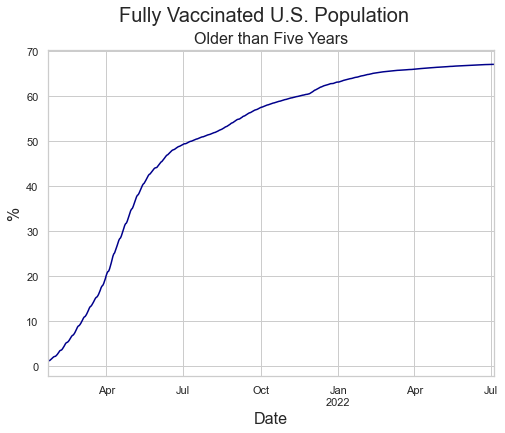

In [15]:
vaccination['people_fully_vaccinated_per_hundred'].plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Fully Vaccinated U.S. Population', fontsize=20)
plt.title('Older than Five Years', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)

Text(0, 0.5, '%')

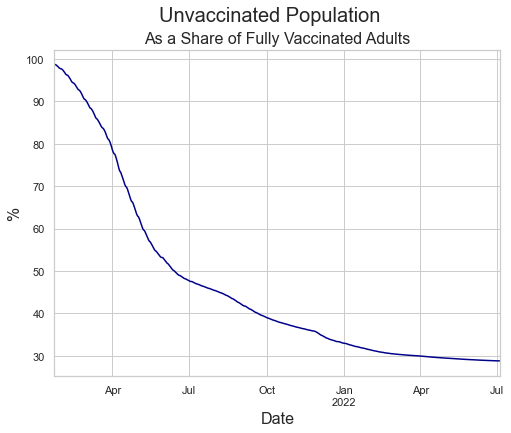

In [16]:
vaccination['outstanding'].plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Unvaccinated Population', fontsize=20)
plt.title('As a Share of Fully Vaccinated Adults', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)

Text(0, 0.5, '%')

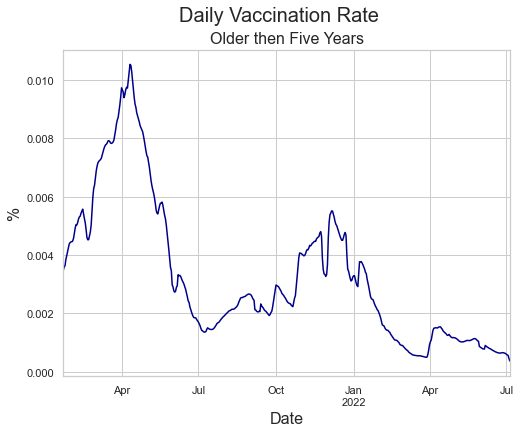

In [17]:
vaccination['rate'].plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Daily Vaccination Rate', fontsize=20)
plt.title('Older then Five Years', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)